In [1]:
from skimage.measure import LineModelND, ransac
from sklearn.linear_model import RANSACRegressor
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from processXYZLines import processXYZLines
from src.openCSV import openCSV


In [16]:
# This version uses the XYZ csv

data_csv_xyz = openCSV(
    "/media/gant/Expansion/tpc_root_raw/DATA_ROOT/labeledcsv/CoBo_2018-06-20T10-51-39.459_0005.csv")

# data_csv_xyz = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/labeledcsv/CoBo_2018-06-20T10-51-39.459_0000.csv") #25 314 568

# data_csv_xyz = openCSV("/media/gant/Expansion/tpc_root_raw/DATA_ROOT/labeledcsv/CoBo_2018-06-16T10-18-38.616_0000.csv") #12
data_csv_xyz.readCSV()

entry_nr = 1311

singular_entry_xyz = data_csv_xyz.m_data[data_csv_xyz.m_data["entry_nr"] == entry_nr]


if singular_entry_xyz.empty:
    print("The value ", entry_nr, " was not found in the 'entry_nr' column.")
else:
    print("The value ", entry_nr, " was found in the 'entry_nr' column.")


The value  1311  was found in the 'entry_nr' column.


For i =  0  the parameters are  [44.8436     53.43698148 40.38600556]  and  [ 0.97353698  0.00221447 -0.2285188 ] 

For i =  1  the parameters are  [48.46689412 52.34355882 43.13397647]  and  [ 0.69020715 -0.29342964 -0.66144776] 



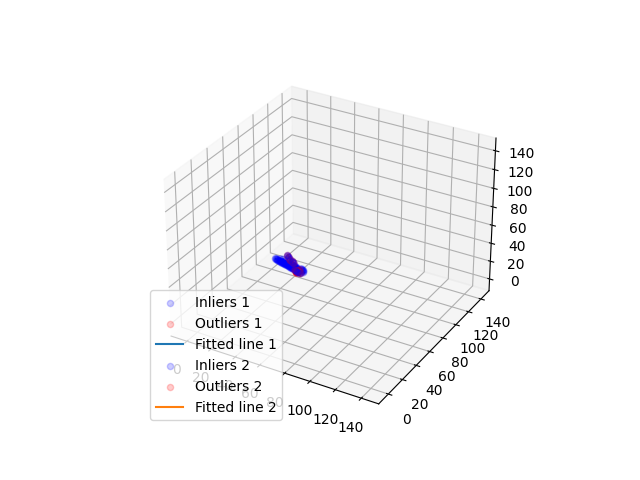

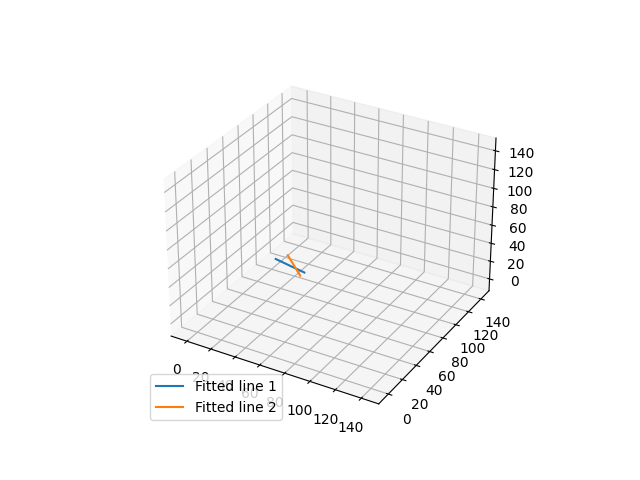

In [17]:
# Use RANSAC in 3D to fit a line to the data set. Format is XYZ.
%matplotlib widget
line_proc_xyz = processXYZLines(singular_entry_xyz)

nr_lines = 2

verbose = True


fig = plt.figure()
model_xyz = line_proc_xyz.fitNLines(fig, nr_lines, False, 4, 2.5)

if (verbose):
    for i in range(len(model_xyz)):
        print("For i = ", i, " the parameters are ",
              model_xyz[i].model_container.params[0], " and ", model_xyz[i].model_container.params[1], "\n")


fig_scat = plt.figure()
line_proc_xyz.fitNLines(fig_scat, nr_lines, True, 4, 2.5)

plt.show()


For i = 0 we have the params: modelDataXYZv2(x0=-116.87761287287636, y0=53.5446953591444, z0=80.11471310434587, dx=3.4499179448289157, dy=-0.005743285230126296, dz=-0.8475996197981817, min_lambda=43.37355707174563, max_lambda=50.18687854080615)
For i = 1 we have the params: modelDataXYZv2(x0=111.23608779799717, y0=135.38770934155437, z0=-256.6292890698891, dx=-2.2348109495848356, dy=-2.71145338962924, dz=10.129189181673787, min_lambda=31.088351258930402, max_lambda=28.17911188850052)


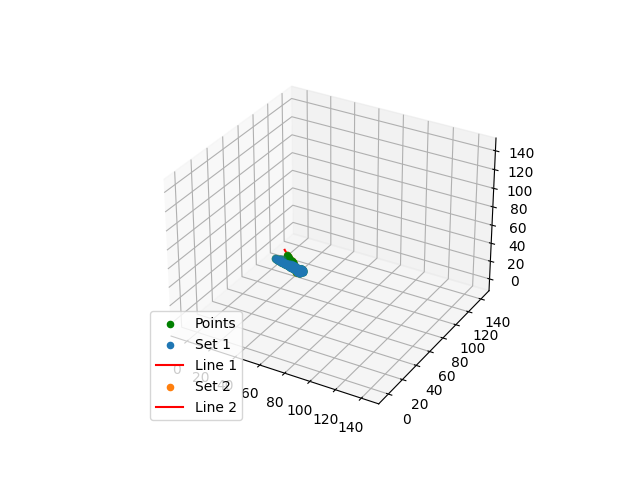

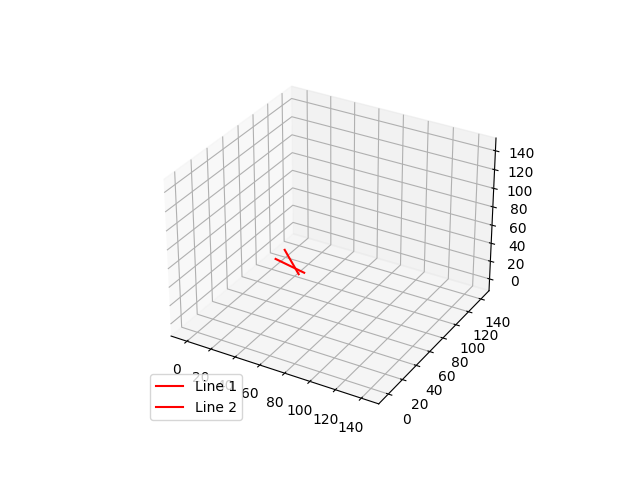

In [18]:
# Find lines by minimizing distance
%matplotlib widget
line_proc_xyz = processXYZLines(singular_entry_xyz)

nr_lines = 5

verbose = True

fig = plt.figure()
model_xyz_v2 = line_proc_xyz.fitNLinesv2(fig, nr_lines, False, 4, 3.5)

if (verbose):
    for i in range(len(model_xyz_v2)):
        print(f"For i = {i} we have the params: {model_xyz_v2[i]}")


fig_scat = plt.figure()
line_proc_xyz.fitNLinesv2(fig_scat, nr_lines, True, 4, 3.5)

plt.show()
